In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
def loadimage(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).resize(image_size) 
            img = np.array(img) / 255.0 
            if img.shape == (image_size[0], image_size[1], 3): 
                images.append(img)
                labels.append(label)
        except Exception as e:
            print(f"error {e}")
    return np.array(images), np.array(labels)

catimage, catlabel= loadimage('/Users/misbahkhursheed/Downloads/kagglecatsanddogs_3367a/PetImages/Cat', label=0)
dogimage, doglabel = loadimage('/Users/misbahkhursheed/Downloads/kagglecatsanddogs_3367a/PetImages/Dog', label=1)

X = np.concatenate((catimage, dogimage), axis=0)
y = np.concatenate((catlabel, doglabel), axis=0)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

error cannot identify image file '/Users/misbahkhursheed/Downloads/kagglecatsanddogs_3367a/PetImages/Cat/.DS_Store'


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


error cannot identify image file '/Users/misbahkhursheed/Downloads/kagglecatsanddogs_3367a/PetImages/Dog/.DS_Store'


In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,569 (9.36 MB)

 Trainable params: 2,453,569 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    Xtrain, Ytrain,
    validation_data=(Xtest, Ytest),
    batch_size=64,
    epochs=5
)

Epoch 1/5
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.8661 - loss: 0.3091 - val_accuracy: 0.8301 - val_loss: 0.3785
Epoch 2/5
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.8854 - loss: 0.2684 - val_accuracy: 0.8434 - val_loss: 0.3610
Epoch 3/5
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.8996 - loss: 0.2405 - val_accuracy: 0.8406 - val_loss: 0.3697
Epoch 4/5
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.9215 - loss: 0.1937 - val_accuracy: 0.8104 - val_loss: 0.4607
Epoch 5/5
312/312 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9333 - loss: 0.1648 - val_accuracy: 0.8406 - val_loss: 0.4162


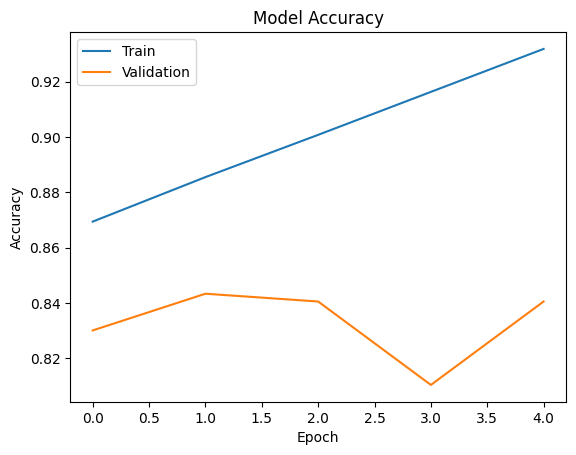

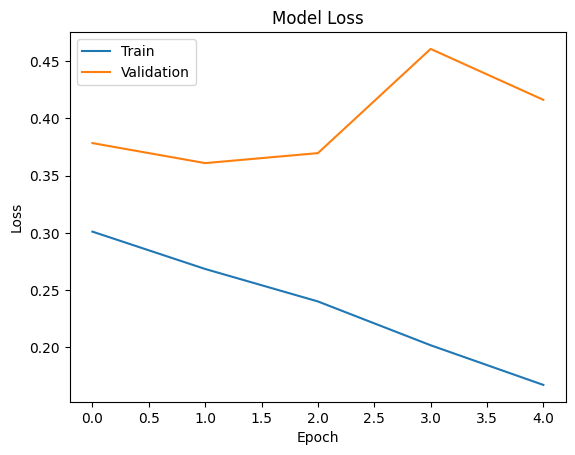

In [8]:
#training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('catdog.keras')